In [6]:
import scipy.io
data = scipy.io.loadmat('Data_ankle.mat')
# Print the keys to understand the structure
print(data.keys())

dict_keys(['__header__', '__version__', '__globals__', 'ankle_data'])


In [7]:
print(data['ankle_data'])
ankle_data= data['ankle_data']
print(ankle_data.shape)

[[ 0.00000000e+00 -1.03213808e+01 -9.42861914e-02 ...  8.25063296e-01
  -1.49258824e+00 -2.01162801e+00]
 [ 1.00000000e-02 -7.99031164e+00 -9.61738741e-02 ...  8.22468551e-01
  -1.49319212e+00 -3.65520937e+00]
 [ 2.00000000e-02 -6.20873764e+00 -9.64488565e-02 ...  8.10996502e-01
  -1.49586655e+00 -5.78643292e+00]
 ...
 [ 4.79970000e+02  5.56958911e+02 -1.12156787e-02 ...  2.25437228e-01
  -1.68091209e+00  4.26107807e+01]
 [ 4.79980000e+02  5.64941734e+02 -5.72538797e-03 ...  2.15807917e-01
  -1.68371085e+00  4.40519172e+01]
 [ 4.79990000e+02  5.74057993e+02 -4.47411580e-03 ...  2.08124660e-01
  -1.68575417e+00  4.51366601e+01]]
(48000, 7)


In [12]:

import scipy.io
import pandas as pd
import matplotlib.pyplot as plt

In [23]:

# Define column names
column_names = [
    'time', 
    'vgrf',  # vertical ground reaction force
    'trunk_angle', 
    'hip_angle', 
    'knee_angle', 
    'ankle_angle', 
    'joint_moment'
]
df = pd.DataFrame(ankle_data, columns=column_names )
missing_values = df.isnull().sum()
print(missing_values)
df.head(), 


time            0
vgrf            0
trunk_angle     0
hip_angle       0
knee_angle      0
ankle_angle     0
joint_moment    0
dtype: int64


(   time       vgrf  trunk_angle  hip_angle  knee_angle  ankle_angle  \
 0  0.00 -10.321381    -0.094286   0.292974    0.825063    -1.492588   
 1  0.01  -7.990312    -0.096174   0.293179    0.822469    -1.493192   
 2  0.02  -6.208738    -0.096449   0.294008    0.810997    -1.495867   
 3  0.03  -5.126637    -0.097196   0.295568    0.785731    -1.501793   
 4  0.04  -4.774037    -0.095624   0.297472    0.745707    -1.511208   
 
    joint_moment  
 0     -2.011628  
 1     -3.655209  
 2     -5.786433  
 3     -6.190008  
 4     -5.542868  ,)

Missing values in each column:
 vgrf            0
trunk_angle     0
hip_angle       0
knee_angle      0
ankle_angle     0
joint_moment    0
dtype: int64
First few rows of the dataframe:
         vgrf  trunk_angle  hip_angle  knee_angle  ankle_angle  joint_moment
0 -10.321381    -0.094286   0.292974    0.825063    -1.492588     -2.011628
1  -7.990312    -0.096174   0.293179    0.822469    -1.493192     -3.655209
2  -6.208738    -0.096449   0.294008    0.810997    -1.495867     -5.786433
3  -5.126637    -0.097196   0.295568    0.785731    -1.501793     -6.190008
4  -4.774037    -0.095624   0.297472    0.745707    -1.511208     -5.542868


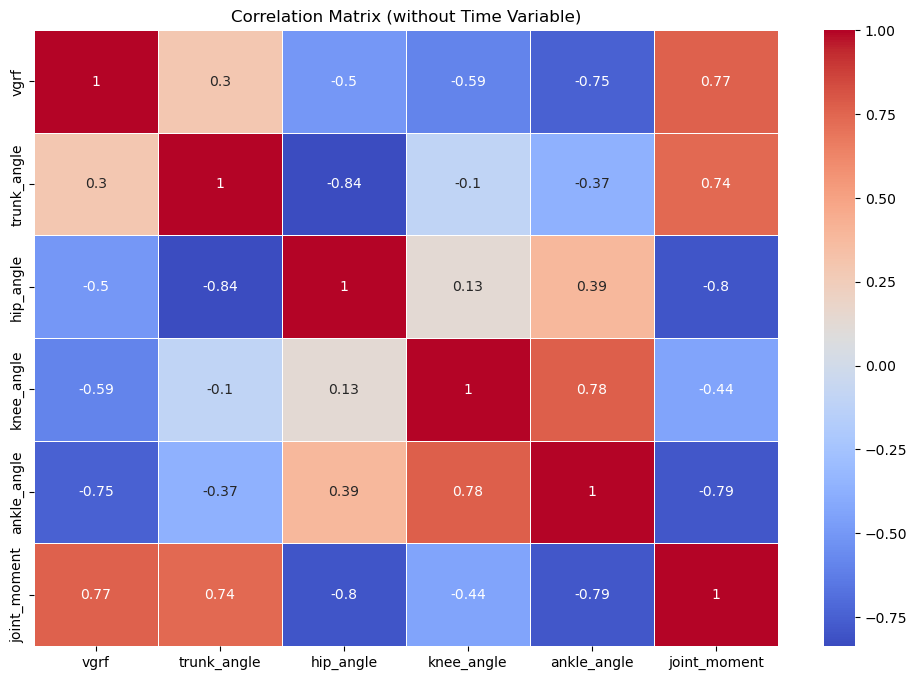

In [25]:

# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Display the first few rows
print("First few rows of the dataframe:\n", df.head())

# Calculate correlation matrix
correlation_matrix = df.corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix (without Time Variable)')
plt.show()

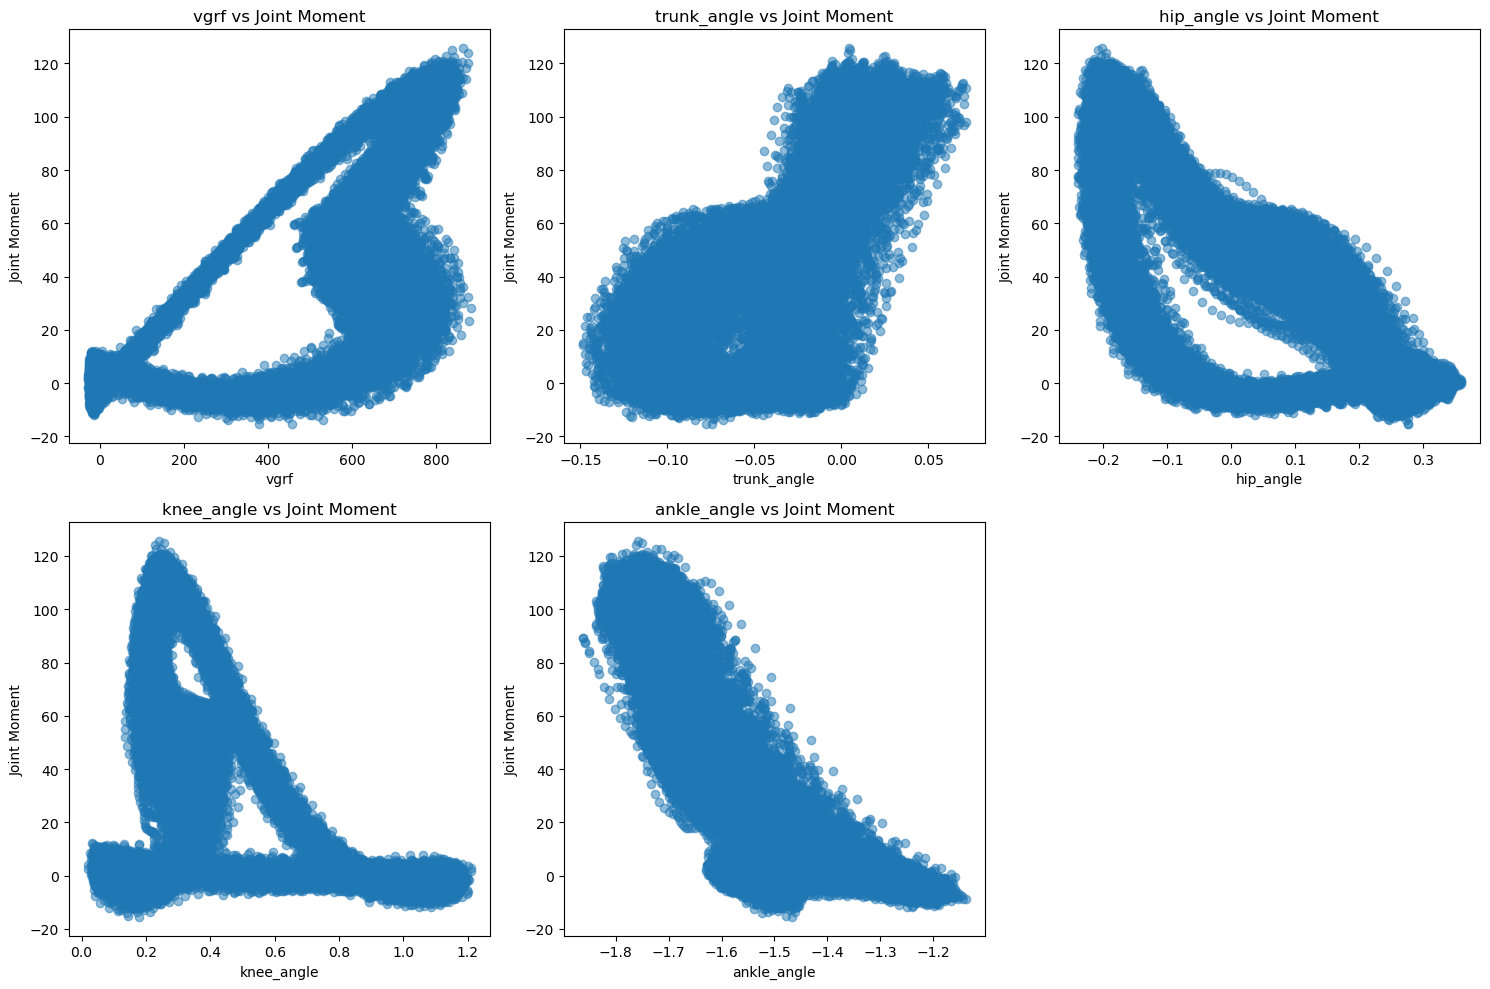

In [26]:
plt.figure(figsize=(15, 10))

# Plot each feature against the target 'joint_moment'
for i, column in enumerate(column_names[1:-1], 1):  # Skip 'time' and 'joint_moment'
    plt.subplot(2, 3, i)
    plt.scatter(df[column], df['joint_moment'], alpha=0.5)
    plt.title(f'{column} vs Joint Moment')
    plt.xlabel(column)
    plt.ylabel('Joint Moment')

plt.tight_layout()
plt.show()

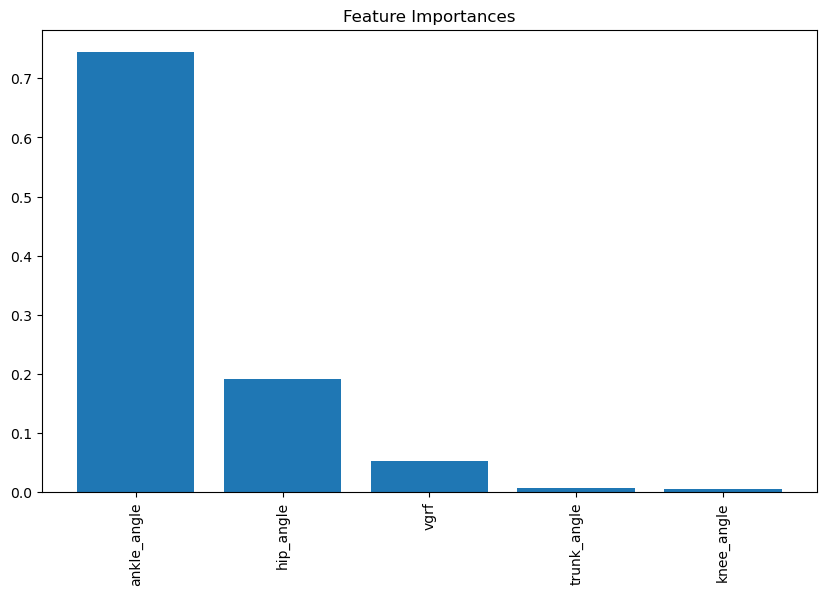

In [28]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Define features and target
X = df.drop(columns=['joint_moment'])
y = df['joint_moment']

# Train a Random Forest model
model = RandomForestRegressor()
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_
feature_names = X.columns

# Plot feature importances
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.show()